C:\Users\JGao\AppData\Local\Temp\ipykernel_12988\3232050655.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SaleAmount_Group'] = pd.cut(df_filtered['PRICE'], bins=[0, 100000, 200000, float('inf')],
C:\Users\JGao\AppData\Local\Temp\ipykernel_12988\3232050655.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby(['PROPERTYZIP', 'SaleAmount_Group']).size().reset_index(name='Count')


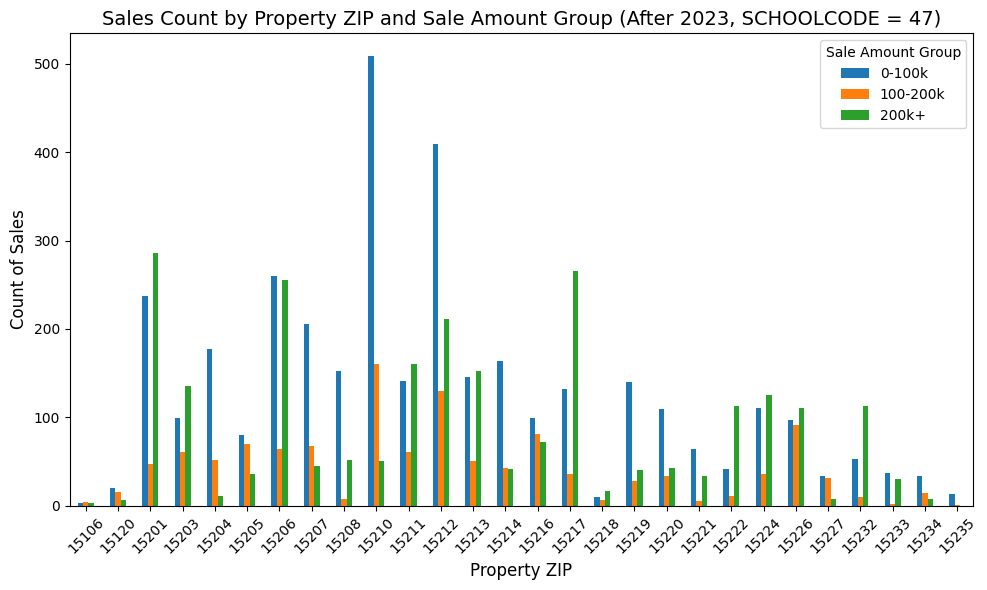

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Get the current working directory and construct the file path
file_path = os.path.join(os.getcwd(), 'Sales-transaction-2024.csv')

# Load the CSV file
df = pd.read_csv(file_path)

# Convert SALEDATE to datetime (if it's not already)
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

# Filter the data for SALEDATE > 2023 and SCHOOLCODE == 47
df_filtered = df[(df['SALEDATE'].dt.year > 2023) & (df['SCHOOLCODE'] == 47)]

# Create a new column for SaleAmount groups
df_filtered['SaleAmount_Group'] = pd.cut(df_filtered['PRICE'], bins=[0, 100000, 200000, float('inf')], 
                                          labels=['0-100k', '100-200k', '200k+'])

# Group by PROPERTYZIP and SaleAmount Group, then aggregate data (e.g., count or sum)
grouped = df_filtered.groupby(['PROPERTYZIP', 'SaleAmount_Group']).size().reset_index(name='Count')

# Create a pivot table to reshape the data for plotting
pivoted = grouped.pivot(index='PROPERTYZIP', columns='SaleAmount_Group', values='Count').fillna(0)

# Plotting the chart
ax = pivoted.plot(kind='bar', stacked=False, figsize=(10, 6))

# Adding labels and title
plt.title('Sales Count by Property ZIP and Sale Amount Group (After 2023, SCHOOLCODE = 47)', fontsize=14)
plt.xlabel('Property ZIP', fontsize=12)
plt.ylabel('Count of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sale Amount Group')

# Show the plot
plt.tight_layout()
plt.show()
